In [1]:
import numpy as np
import matplotlib.pyplot as plt

V = [1/6, 1/3, 1/2, 2/3, 5/6]
np.random.seed(20)

In [46]:
## construct training data
training_data = {}
for t in range(100):
    ## construct sequence
    sequence = {}
    for n in range(10):
        # simulation
        state = 3
        action = [-1, 1]
        states = [state]
        i = 0
        for i in range(100):
            i+=1
            move = np.random.choice(action)
            state = state + move
            states.append(state)
            if state in [0,6]:
                break
        sequence[n]=states
    training_data[t] = sequence

In [47]:
xa=np.array([0,0,0,0,0]).T
xb=np.array([1,0,0,0,0]).T
xc=np.array([0,1,0,0,0]).T
xd=np.array([0,0,1,0,0]).T
xe=np.array([0,0,0,1,0]).T
xf=np.array([0,0,0,0,1]).T
xg=np.array([0,0,0,0,0]).T
x = [xa, xb, xc, xd, xe, xf, xg]

# Experiment 1: Figure 3 Replication

In [64]:
## initialize
exp3=[]
lmd_list = [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1]
rewards = [0,0,0,0,0,0,1]
alpha = 0.01

for lmd in lmd_list:
    perf = []
    ## run 100 training data
    for j in range(100):
        sequence = training_data[j]
        w = np.array([0.5,0.5,0.5,0.5,0.5])
        total_delta_w = [1]
        while sum([abs(d) for d in total_delta_w])>=0.001:
            ## run 10 sequence (1 training data):
            total_delta_w = 0
            for i in range(10):
                states = sequence[i]
                # run 1 sequnce, iterate all the states
                for t in range(len(states)-1):
                    s = x[states[t]] 
                    p = s.dot(w.T)

                    #####################   TD(lambda!!)   #################
                    r = rewards[states[t+1]]
                    p_prime = x[states[t+1]].dot(w.T)

                    k = [t-k for k in range(t+1)]
                    gradient = sum([(lmd**kk)*x[ss] for ss,kk in zip(states[:t+1], k)])   

                    delta_w = alpha * (r+p_prime - p) * gradient
                    total_delta_w = total_delta_w + delta_w

            w = w + total_delta_w ## update w after 10 sequence
        perf.append(np.sqrt(((np.array(w)-np.array(V))**2).mean()))
    exp3.append(np.mean(perf))

Text(0.5, 1.0, 'Figure 3 Replication')

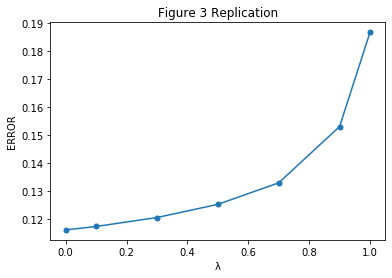

In [65]:
plt.plot(lmd_list, exp3, marker='o', markersize=5)
plt.ylabel('ERROR')
plt.xlabel('λ')
plt.title('Figure 3 Replication')

# Experiment 2: Figure 4 Replication

In [56]:
exp4=np.zeros((4,13))
rewards = [0,0,0,0,0,0,1]
lmd_list = [0, 0.3, 0.8, 1]
alpha_list=[0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
## initialize
for l in range(4):
    lmd = lmd_list[l]
    for a in range(13):
        alpha = alpha_list[a]
        ## run 100 training data
        for j in range(100):
            sequence = training_data[j]
            w = np.array([0.5,0.5,0.5,0.5,0.5])
            perf = []
            ###############  run 1 training data, for 10 sequence  #############
            for i in range(10):
                total_delta_w = 0
                states = sequence[i]
                if len(states)<=18:
                    ################ run 1 sequnce, iterate all the states###########
                    for t in range(len(states)-1):
                        s = x[states[t]] 
                        p = s.dot(w.T) 

                        r = rewards[states[t+1]]
                        p_prime = x[states[t+1]].dot(w.T)

                        k = [t-k for k in range(t+1)]
                        gradient = sum([(lmd**kk)*x[ss] for ss,kk in zip(states[:t+1], k)])   

                        delta_w = alpha * (r+p_prime - p) * gradient
                        total_delta_w = total_delta_w + delta_w
                    ################ FINISHED: run 1 sequnce, iterate all the states###########

                    w = w + total_delta_w ## update w after EACH sequence
                   ############### FINISHED:  run 1 training data, for 10 sequence  #############    
                
            perf.append(np.sqrt(((np.array(w)-np.array(V))**2).mean())) ##record perf of a training dataset
            exp4[l][a] += np.mean(perf)

exp4/=100

Text(0.5, 1.0, 'Figure 4 Replication')

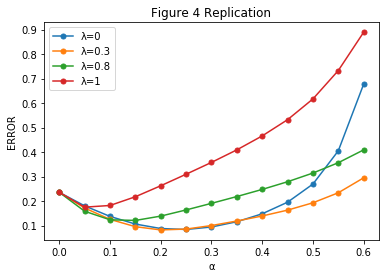

In [57]:
plt.plot(alpha_list,exp4[0], label = 'λ=0',marker='o', markersize=5)
plt.plot(alpha_list,exp4[1], label = 'λ=0.3',marker='o', markersize=5)
plt.plot(alpha_list,exp4[2], label = 'λ=0.8',marker='o', markersize=5)
plt.plot(alpha_list,exp4[3], label = 'λ=1',marker='o', markersize=5)
plt.legend()
plt.ylabel('ERROR')
plt.xlabel('α')
plt.title('Figure 4 Replication')

# Experiment 3: Figure 5 Replication

In [58]:
### check opt alpha for each lambda
rewards = [0,0,0,0,0,0,1]
lmd_list = np.arange(11)*0.1
alpha_list = np.arange(13)*0.05
exp5 = np.zeros((len(lmd_list),len(alpha_list)))

for l in range(len(lmd_list)):
    lmd = lmd_list[l]
    for a in range(len(alpha_list)):
        alpha = alpha_list[a]
        ## run 100 training data
        for j in range(100):
            sequence = training_data[j]
            w = np.array([0.5,0.5,0.5,0.5,0.5])
            perf = []
            ###############  run 1 training data, for 10 sequence  #############
            for i in range(10):
                total_delta_w = 0
                states = sequence[i]
                if len(states)<=18:                
                    ################ run 1 sequnce, iterate all the states###########
                    for t in range(len(states)-1):
                        s = x[states[t]] 
                        p = s.dot(w.T) 

                        r = rewards[states[t+1]]
                        p_prime = x[states[t+1]].dot(w.T)

                        k = [t-k for k in range(t+1)]
                        gradient = sum([(lmd**kk)*x[ss] for ss,kk in zip(states[:t+1], k)])   

                        delta_w = alpha * (r+p_prime - p) * gradient
                        total_delta_w = total_delta_w + delta_w
                    ################ FINISHED: run 1 sequnce, iterate all the states###########

                    w = w + total_delta_w ## update w after EACH sequence
                   ############### FINISHED:  run 1 training data, for 10 sequence  #############    

            perf.append(np.sqrt(((np.array(w)-np.array(V))**2).mean())) ##record perf of a training dataset
            exp5[l][a] += np.mean(perf)

exp5/=100

In [59]:
best_alp_v={}
for l in range(len(lmd_list)):
    best_alp_v[l] = alpha_list[np.argmin(exp5[l])]

In [62]:
#### get best performance
rewards = [0,0,0,0,0,0,1]
lmd_list = np.arange(11)*0.1
alpha_list = np.arange(13)*0.05
exp5_opt = np.zeros(len(lmd_list))

for l in range(len(lmd_list)):
    lmd = lmd_list[l]
    alpha = best_alp_v[l]
    ## run 100 training data
    for j in range(100):
        sequence = training_data[j]
        w = np.array([0.5,0.5,0.5,0.5,0.5])
        perf = []
        ###############  run 1 training data, for 10 sequence  #############
        for i in range(10):
            total_delta_w = 0
            states = sequence[i]
            if len(states)<=20:

                ################ run 1 sequnce, iterate all the states###########
                for t in range(len(states)-1):
                    s = x[states[t]] 
                    p = s.dot(w.T) 

                    r = rewards[states[t+1]]
                    p_prime = x[states[t+1]].dot(w.T)

                    k = [t-k for k in range(t+1)]
                    gradient = sum([(lmd**kk)*x[ss] for ss,kk in zip(states[:t+1], k)])   

                    delta_w = alpha * (r+p_prime - p) * gradient
                    total_delta_w = total_delta_w + delta_w
                ################ FINISHED: run 1 sequnce, iterate all the states###########

                w = w + total_delta_w ## update w after EACH sequence
               ############### FINISHED:  run 1 training data, for 10 sequence  #############    

        perf.append(np.sqrt(((np.array(w)-np.array(V))**2).mean())) ##record perf of a training dataset
        exp5_opt[l] += np.mean(perf)
        
exp5_opt/=100

Text(0.5, 1.0, 'Figure 5 Replication')

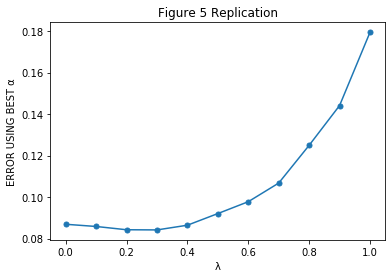

In [61]:
plt.plot(lmd_list, exp5_opt,marker='o', markersize=5)
plt.ylabel('ERROR USING BEST α')
plt.xlabel('λ')
plt.title('Figure 5 Replication')